In [1]:
import pickle
import numpy as np
import pandas as pd

def RMSEscore(pred, true):
    return np.mean(np.abs(pred - true))


def CCCscore(y_pred, y_true):
    # pred: shape{n sample, m cell}
    ccc_value = 0
    for i in range(y_pred.shape[1]):
        r = np.corrcoef(y_pred[:, i], y_true[:, i])[0, 1]
        # print(r)
        # Mean
        mean_true = np.mean(y_true[:, i])
        mean_pred = np.mean(y_pred[:, i])
        # Variance
        var_true = np.var(y_true[:, i])
        var_pred = np.var(y_pred[:, i])
        # Standard deviation
        sd_true = np.std(y_true[:, i])
        sd_pred = np.std(y_pred[:, i])
        # Calculate CCC
        numerator = 2 * r * sd_true * sd_pred
        denominator = var_true + var_pred + (mean_true - mean_pred) ** 2
        ccc = numerator / denominator
        # print(ccc)
        ccc_value += ccc
    return ccc_value / y_pred.shape[1]

def score(pred, label):
    distance = []
    ccc = []
    new_pred = pred.reshape(-1,1)
    new_label = label.reshape(-1,1)
    distance.append(RMSEscore(new_pred, new_label))
    ccc.append(CCCscore(new_pred, new_label))
    # print(distance[0], ccc[0])
    return distance[0], ccc[0]

In [2]:
# dir_name='WGBS_sim'
# dir_name='generated_sim'
# dir_name='Multi_channel_AE_sim'
dir_name='WGBS_sim/two_sim_spar0.5_ref_1+2'
k='1'
beta_truth_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/new_data_output/'+dir_name+'/'+k+'_beta_true.pkl'
# beta_truth_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/new_data_output/Multi_channel_WGBS/one_sim_spar0.3_ref1_1+2_a/beta_true.pkl'
with open(beta_truth_path, "rb") as fin:
    beta_truth = pickle.load(fin)

print('beta_truth',beta_truth.shape)

beta_est_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/new_data_output/'+dir_name+'/'+k+'_beta_est.pkl'
# beta_est_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/new_data_output/Multi_channel_WGBS/one_sim_spar0.3_ref1_1+2_a/beta_est.pkl'

with open(beta_est_path, "rb") as fin:
    beta_est = pickle.load(fin)

print('beta_est',beta_est.shape)

beta_truth (9, 1582, 5)
beta_est (9, 1582, 5)


In [201]:
#one sim
dir_name='output/Multi_channel_WGBS/one_sim_spar0.3_a'
dir_name='output/Multi_channel_WGBS/one_sim_spar0'
dir_name='new_data_output/Multi_channel_WGBS/one_sim_spar0.5_ref1_1+2_a'

# beta_truth_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/output/'+dir_name+'/'+k+'_beta_true.pkl'
beta_truth_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/'+dir_name+'/beta_true.pkl'
with open(beta_truth_path, "rb") as fin:
    beta_truth = pickle.load(fin)

print('beta_truth',beta_truth.shape)

##two sim

# dir_name='new_data_output/Multi_channel_WGBS/two_sim_spar0.5_ref_1+2_a'
# # dir_name='new_data_output/Multi_channel_WGBS/two_sim_spar0.5_ref_2+1_a'

# # beta_truth_path_1='/mnt/nas/user/yixuan/cfDNA/CelFEER/output/'+dir_name+'/beta_true_1.pkl'
# beta_truth_path_1='/mnt/nas/user/yixuan/cfDNA/CelFEER/'+dir_name+'/beta_true_1.pkl'

# with open(beta_truth_path_1, "rb") as fin:
#     beta_truth_1 = pickle.load(fin)
# # beta_truth_path_2='/mnt/nas/user/yixuan/cfDNA/CelFEER/output/'+dir_name+'/beta_true_2.pkl'
# beta_truth_path_2='/mnt/nas/user/yixuan/cfDNA/CelFEER/'+dir_name+'/beta_true_2.pkl'
# with open(beta_truth_path_2, "rb") as fin:
#     beta_truth_2 = pickle.load(fin)

# beta_truth = np.mean([beta_truth_1,beta_truth_2],axis=0)
# print('beta_truth',beta_truth.shape)

# beta_est_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/output/'+dir_name+'/'+k+'_beta_est.pkl'
beta_est_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/'+dir_name+'/beta_est.pkl'

with open(beta_est_path, "rb") as fin:
    beta_est = pickle.load(fin)

print('beta_est',beta_est.shape)

beta_truth (9, 1581, 5)
beta_est (9, 1581, 5)


In [193]:
beta_truth=beta_truth_1
# beta_est=beta_truth_2

In [194]:
# # dir_name='WGBS_sim'
# # dir_name='generated_sim'
# # dir_name='Multi_channel_AE_sim'
# dir_name='Multi_channel_WGBS'
# dir_name='new_data_output/Multi_channel_WGBS/one_sim_spar0.3_211_high'

# beta_truth_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/'+dir_name+'/beta_true.pkl'
# # beta_truth_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/output/WGBS_sim/1_beta_true.pkl'
# with open(beta_truth_path, "rb") as fin:
#     beta_truth = pickle.load(fin)

# beta_est_path='/mnt/nas/user/yixuan/cfDNA/CelFEER/'+dir_name+'/beta_est.pkl'
# with open(beta_est_path, "rb") as fin:
#     beta_est = pickle.load(fin)

In [195]:

# L1 = {}
# CCC = {}
# L1_cell = {}
# CCC_cell = {}
# # for c in beta_est.keys():
# for c in range(beta_est.shape[0]):
#     sum_last_dim = np.sum(beta_est[c], axis=1, keepdims=True)
#     beta_est[c] = beta_est[c] / sum_last_dim #normalize
#     beta_est[c][np.isnan(beta_est[c])] = 0
#     L1[str(c)]={}
#     CCC[str(c)]={}
#     L1_cell[str(c)] = []
#     CCC_cell[str(c)] = []
#     for i in range(beta_est[c].shape[0]):
#         L1[str(c)][str(i)]=[]
#         CCC[str(c)][str(i)]=[]
#         temp_beta_est = beta_est[c].reshape(1,beta_est[c].shape[0],beta_est[c].shape[1])
#         for j in range(beta_est[c].shape[1]):
#             l1, ccc = score(temp_beta_est[:,:,j],beta_truth[c,:,j])
#             L1[str(c)][str(i)].append(l1)
#             CCC[str(c)][str(i)].append(ccc)
#         # print(str(c),'_',str(i),':',sum(L1[str(c)][str(i)])/len(L1[str(c)][str(i)]),sum(CCC[str(c)][str(i)])/len(CCC[str(c)][str(i)]))
#         L1_cell[str(c)].append(sum(L1[str(c)][str(i)])/len(L1[str(c)][str(i)]))
#         CCC_cell[str(c)].append(sum(CCC[str(c)][str(i)])/len(CCC[str(c)][str(i)]))

#     print(str(c),':',sum(L1_cell[str(c)])/len(L1_cell[str(c)]),sum(CCC_cell[str(c)])/len(CCC_cell[str(c)]))



In [3]:
beta_est=beta_est.reshape(beta_truth.shape[0],-1,beta_truth.shape[2])
beta_est[np.isnan(beta_est)] = 0
# Calculate the sum along the last dimension
sum_last_dim = np.sum(beta_est, axis=2, keepdims=True)

# Normalize beta_est along the last dimension
beta_est = beta_est / sum_last_dim
beta_est[np.isnan(beta_est)] = 0
print('beta_est',beta_est.shape)

beta_est (9, 1582, 5)


In [4]:
L1 = {}
CCC = {}
for i in range(beta_est.shape[0]):
    L1[str(i)]=[]
    CCC[str(i)]=[]
    for j in range(beta_est.shape[2]):
        l1, ccc = score(beta_est[i,:,j],beta_truth[i,:,j])
        L1[str(i)].append(l1)
        CCC[str(i)].append(ccc)
    print(str(i),':',sum(L1[str(i)])/len(L1[str(i)]),sum(CCC[str(i)])/len(CCC[str(i)]))

L1 = {}
CCC = {}
for i in range(beta_est.shape[2]):
    L1[str(i)]=[]
    CCC[str(i)]=[]
    for j in range(beta_est.shape[0]):
        l1, ccc = score(beta_est[j,:,i],beta_truth[j,:,i])
        L1[str(i)].append(l1)
        CCC[str(i)].append(ccc)
    print(str(i),':',sum(L1[str(i)])/len(L1[str(i)]),sum(CCC[str(i)])/len(CCC[str(i)]))

0 : 0.01636399260720139 0.9676103800556138
1 : 0.013366848491591376 0.977394473862583
2 : 0.005533571179583486 0.9942000794953737
3 : 0.022748541368917175 0.9419401972246868
4 : 0.018268745549145652 0.9680532590083782
5 : 0.007750686534357089 0.9910009890285775
6 : 0.006894369588985294 0.9930388986013385
7 : 0.01495630089785164 0.9736096137753
8 : 0.012398125731090209 0.98042302994675
0 : 0.015247554496852651 0.9908521782196098
1 : 0.011100011492649565 0.9630251181169682
2 : 0.002360126598811881 0.9767545061365693
3 : 0.013585075929030414 0.9642575748886494
4 : 0.023418999231946215 0.9869278009707596


In [5]:
beta_truth=beta_truth_2
L1 = {}
CCC = {}
for i in range(beta_est.shape[0]):
    L1[str(i)]=[]
    CCC[str(i)]=[]
    for j in range(beta_est.shape[2]):
        l1, ccc = score(beta_est[i,:,j],beta_truth[i,:,j])
        L1[str(i)].append(l1)
        CCC[str(i)].append(ccc)
    print(str(i),':',sum(L1[str(i)])/len(L1[str(i)]),sum(CCC[str(i)])/len(CCC[str(i)]))

L1 = {}
CCC = {}
for i in range(beta_est.shape[2]):
    L1[str(i)]=[]
    CCC[str(i)]=[]
    for j in range(beta_est.shape[0]):
        l1, ccc = score(beta_est[j,:,i],beta_truth[j,:,i])
        L1[str(i)].append(l1)
        CCC[str(i)].append(ccc)
    print(str(i),':',sum(L1[str(i)])/len(L1[str(i)]),sum(CCC[str(i)])/len(CCC[str(i)]))

NameError: name 'beta_truth_2' is not defined

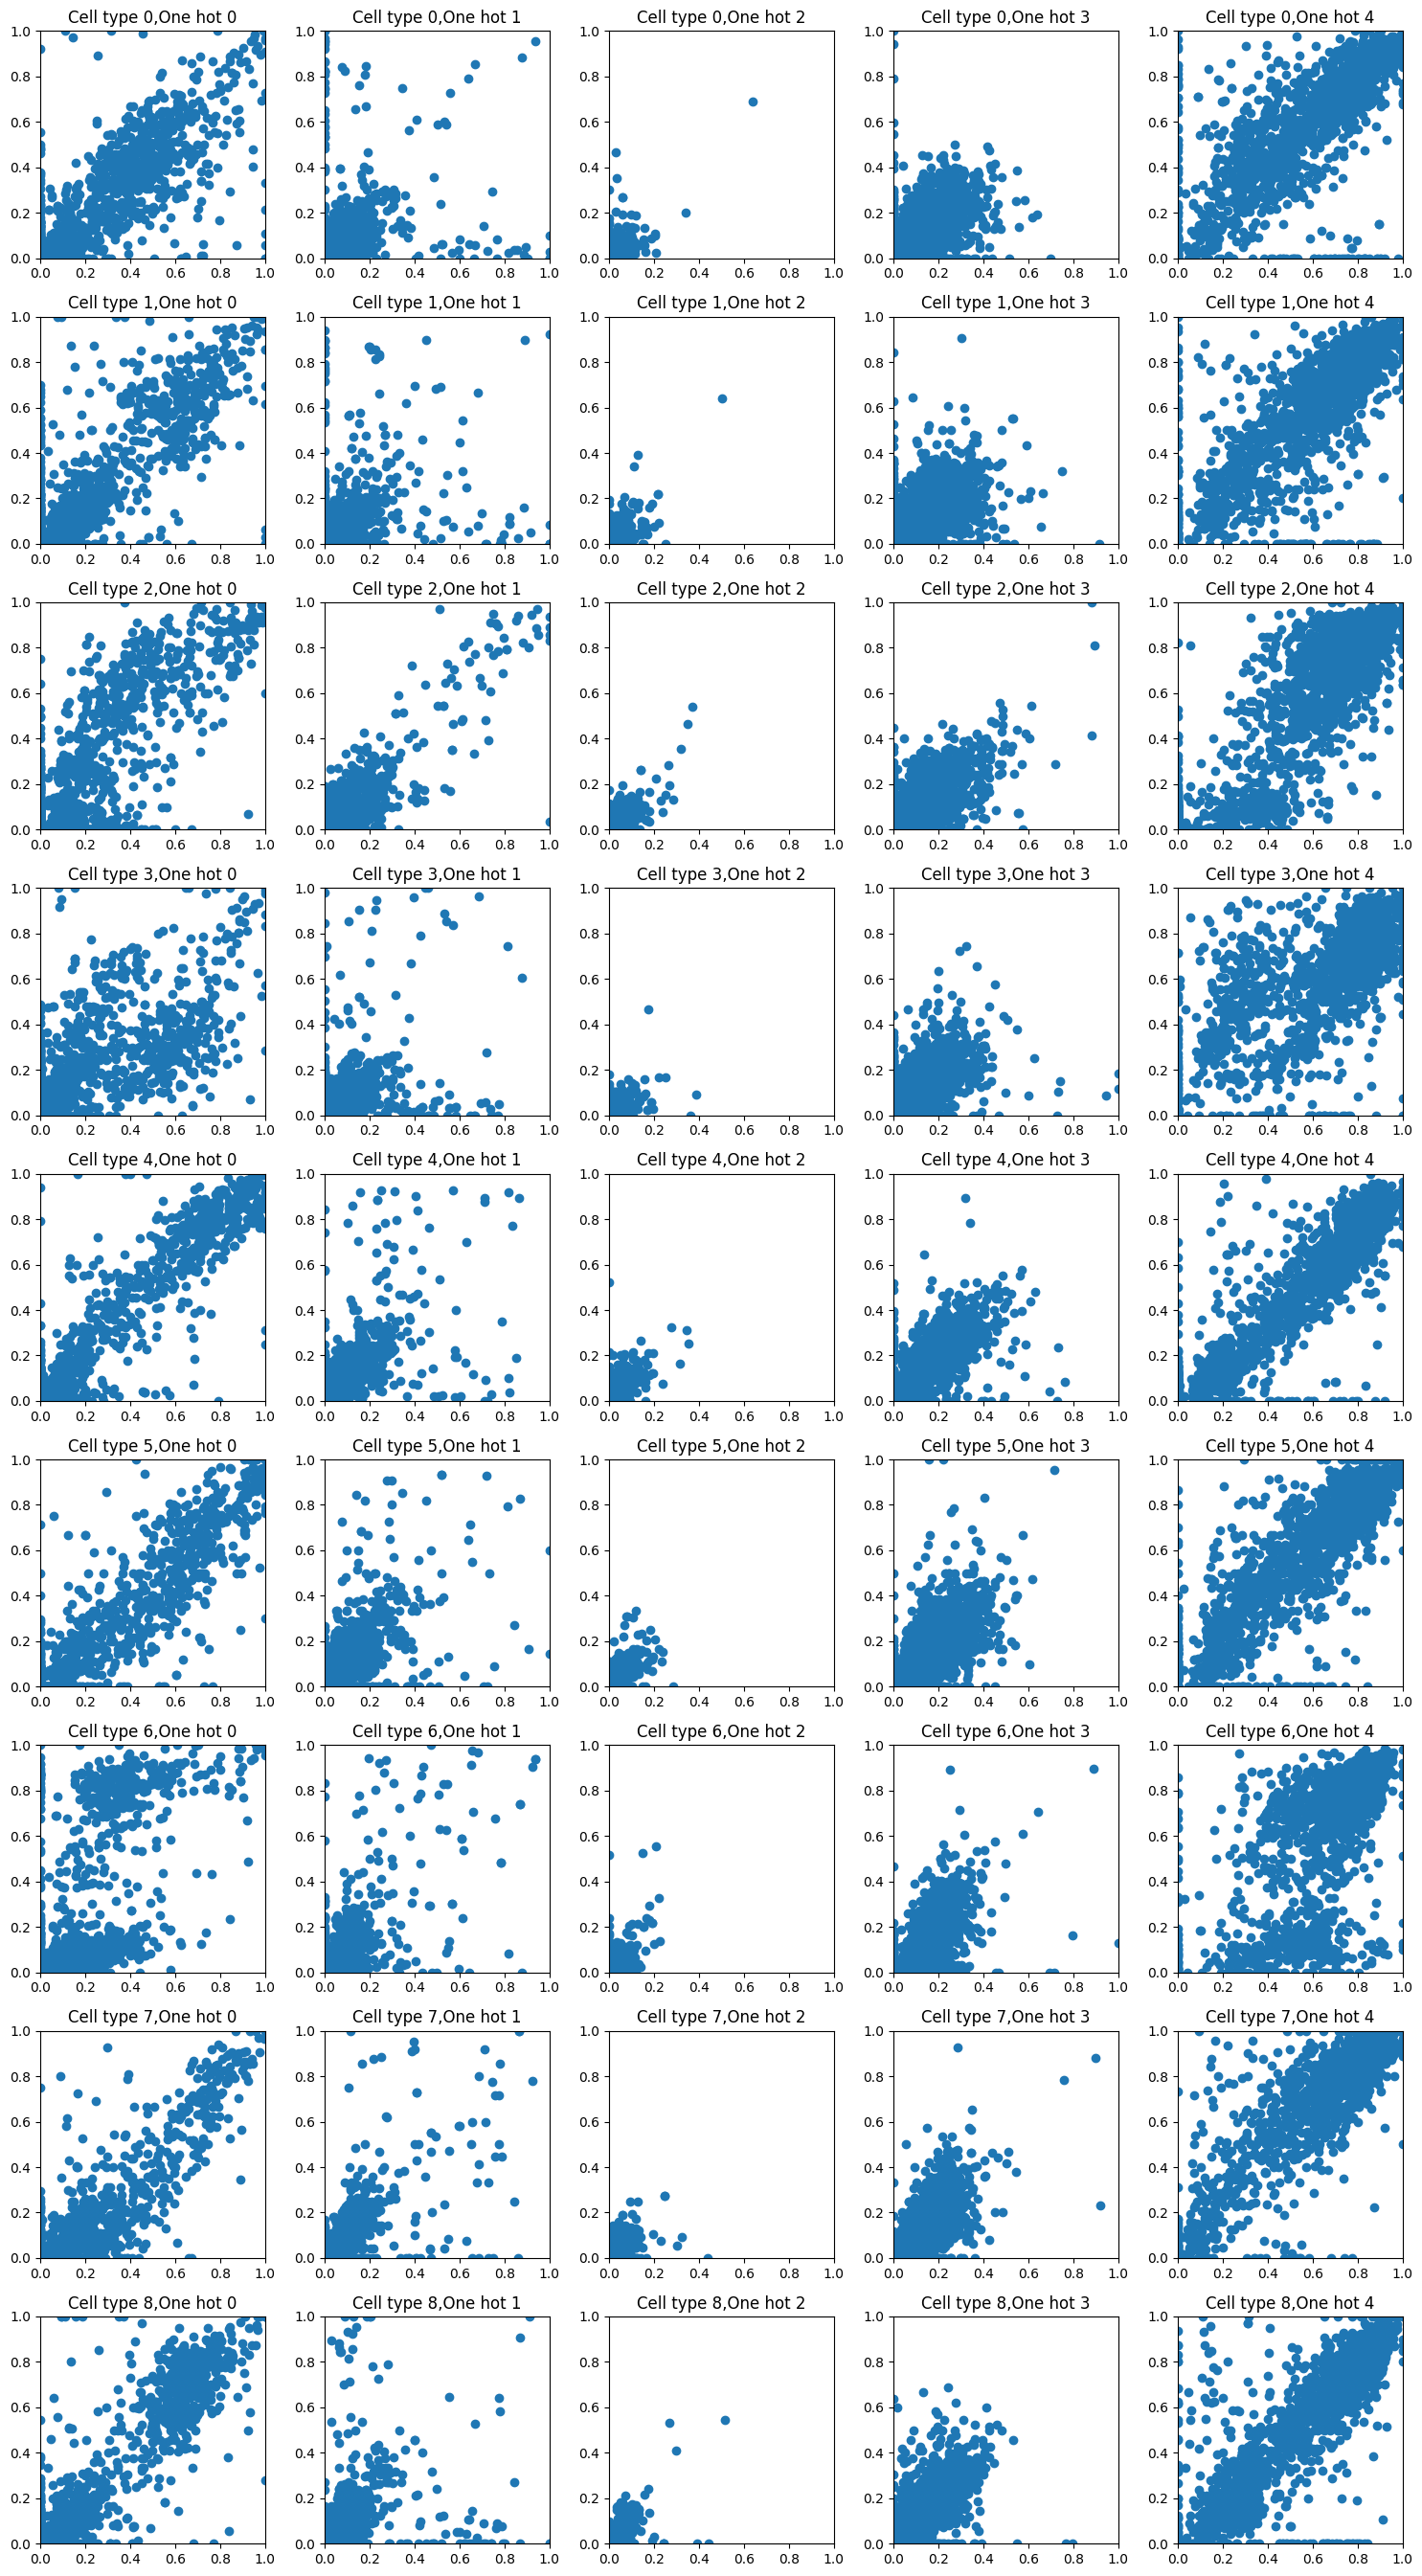

In [191]:
import matplotlib.pyplot as plt
# Generate some random scatter data
num_plots = beta_est.shape[0] * beta_est.shape[2]  # Total number of scatter plots

fig, axs = plt.subplots(beta_est.shape[0], beta_est.shape[2], figsize=(beta_est.shape[2]*3, beta_est.shape[0]*3))  # Create a figure with 7 rows and 5 columns

# Plotting the scatter plots
for i in range(beta_est.shape[0]):
    for j in range(beta_est.shape[2]):
        # Generate random data for each scatter plot
        x = beta_est[i,:,j]
        y = beta_truth[i,:,j]
        
        # Plot the scatter plot in the corresponding subplot
        axs[i, j].scatter(x, y)
        axs[i, j].set_title(f"Cell type {i},One hot {j}")  # Set the title for each subplot
        axs[i, j].set_xlim([0, 1])
        axs[i, j].set_ylim([0, 1])
# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()